<a href="https://colab.research.google.com/github/SandipKumar06529/EDA-on-New_York_Airbnb/blob/main/AirBnb_Newyork_Open_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [3]:
# Load the datasets from CSV files
calendar_df = pd.read_csv('/content/calendar.csv')
listings_df = pd.read_csv('/content/listings.csv')
reviews_df = pd.read_csv('/content/reviews.csv')


In [4]:
# Display the first few rows of each dataframe
print(calendar_df.head())
print(listings_df.head())
print(reviews_df.head())


   listing_id        date available   price  adjusted_price  minimum_nights  \
0     2992450  2024-09-05         f  $70.00             NaN              28   
1     2992450  2024-09-06         f  $70.00             NaN              28   
2     2992450  2024-09-07         f  $70.00             NaN              28   
3     2992450  2024-09-08         f  $70.00             NaN              28   
4     2992450  2024-09-09         f  $70.00             NaN              28   

   maximum_nights  
0            1125  
1            1125  
2            1125  
3            1125  
4            1125  
        id                           listing_url       scrape_id last_scraped  \
0  2992450  https://www.airbnb.com/rooms/2992450  20240905032005   2024-09-05   
1  3820211  https://www.airbnb.com/rooms/3820211  20240905032005   2024-09-05   
2  5651579  https://www.airbnb.com/rooms/5651579  20240905032005   2024-09-05   
3  6623339  https://www.airbnb.com/rooms/6623339  20240905032005   2024-09-05   


In [5]:
# Display initial rows to understand the structure
print(listings_df.head())


        id                           listing_url       scrape_id last_scraped  \
0  2992450  https://www.airbnb.com/rooms/2992450  20240905032005   2024-09-05   
1  3820211  https://www.airbnb.com/rooms/3820211  20240905032005   2024-09-05   
2  5651579  https://www.airbnb.com/rooms/5651579  20240905032005   2024-09-05   
3  6623339  https://www.airbnb.com/rooms/6623339  20240905032005   2024-09-05   
4  8035768  https://www.airbnb.com/rooms/8035768  20240905032005   2024-09-05   

        source                                              name  \
0  city scrape                        Luxury 2 bedroom apartment   
1  city scrape         Restored Precinct in Center Sq. w/Parking   
2  city scrape        Large studio apt  by Capital Center & ESP@   
3  city scrape  Center Sq. Loft in Converted Precinct w/ Parking   
4  city scrape            Entire Beautiful French Victorian 1884   

                                         description  \
0  The apartment is located in a quiet neighborh

In [6]:
# Display data information to understand data types and null values
listings_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            426 non-null    int64  
 1   listing_url                                   426 non-null    object 
 2   scrape_id                                     426 non-null    int64  
 3   last_scraped                                  426 non-null    object 
 4   source                                        426 non-null    object 
 5   name                                          426 non-null    object 
 6   description                                   413 non-null    object 
 7   neighborhood_overview                         228 non-null    object 
 8   picture_url                                   426 non-null    object 
 9   host_id                                       426 non-null    int

In [7]:
# Check for missing values in each column
print("Missing values:\n", listings_df.isnull().sum())


Missing values:
 id                                               0
listing_url                                      0
scrape_id                                        0
last_scraped                                     0
source                                           0
                                                ..
calculated_host_listings_count                   0
calculated_host_listings_count_entire_homes      0
calculated_host_listings_count_private_rooms     0
calculated_host_listings_count_shared_rooms      0
reviews_per_month                               60
Length: 75, dtype: int64


In [8]:
# Check descriptive statistics for numerical columns
print(listings_df.describe())


                 id     scrape_id       host_id  host_listings_count  \
count  4.260000e+02  4.260000e+02  4.260000e+02           426.000000   
mean   6.048429e+17  2.024091e+13  2.226169e+08            23.424883   
std    4.706590e+17  0.000000e+00  1.849103e+08           141.914507   
min    2.992450e+06  2.024091e+13  6.490680e+05             1.000000   
25%    5.024705e+07  2.024091e+13  4.762598e+07             2.000000   
50%    7.545450e+17  2.024091e+13  1.855943e+08             4.000000   
75%    1.014469e+18  2.024091e+13  3.829705e+08             9.000000   
max    1.237964e+18  2.024091e+13  5.808926e+08          1208.000000   

       host_total_listings_count  neighbourhood_group_cleansed    latitude  \
count                 426.000000                           0.0  426.000000   
mean                   40.791080                           NaN   42.658027   
std                   271.701845                           NaN    0.009528   
min                     1.000000       

In [9]:
# Fill missing values in 'reviews_per_month' with 0, as no reviews means 0 monthly reviews
listings_df['reviews_per_month'] = listings_df['reviews_per_month'].fillna(0)


In [10]:
# Convert last_review to datetime format
listings_df['last_review'] = pd.to_datetime(listings_df['last_review'], errors='coerce')


In [11]:
# Remove any duplicate entries from the listings data
listings_df = listings_df.drop_duplicates()


In [14]:
# Remove any non-numeric characters from 'price', then convert it to a numeric format
listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Filter out extreme outliers in price to limit the maximum to $1000
listings_df = listings_df[listings_df['price'] <= 1000]

# verify the changes
listings_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 425
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            398 non-null    int64         
 1   listing_url                                   398 non-null    object        
 2   scrape_id                                     398 non-null    int64         
 3   last_scraped                                  398 non-null    object        
 4   source                                        398 non-null    object        
 5   name                                          398 non-null    object        
 6   description                                   386 non-null    object        
 7   neighborhood_overview                         212 non-null    object        
 8   picture_url                                   398 non-null    object       

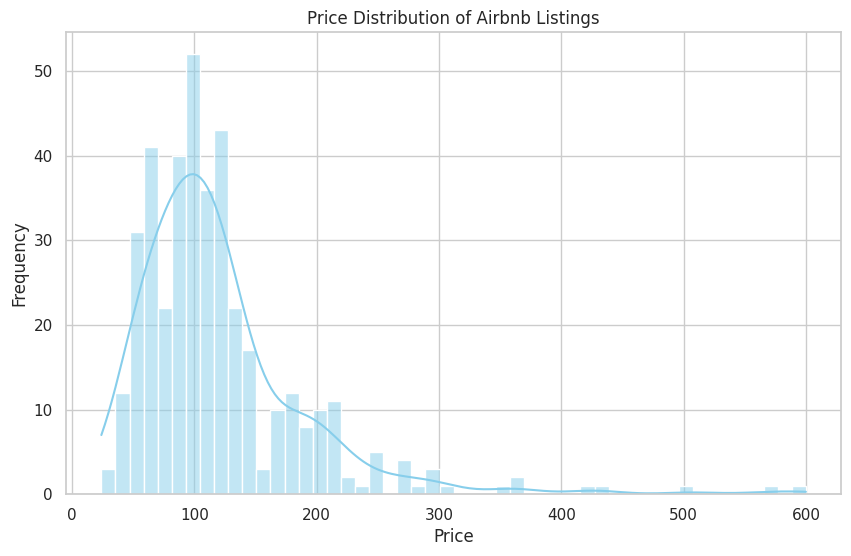

In [16]:
# Histogram for price distribution
plt.figure(figsize=(10, 6))
sns.histplot(listings_df['price'], bins=50, kde=True, color='skyblue')
plt.title("Price Distribution of Airbnb Listings")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


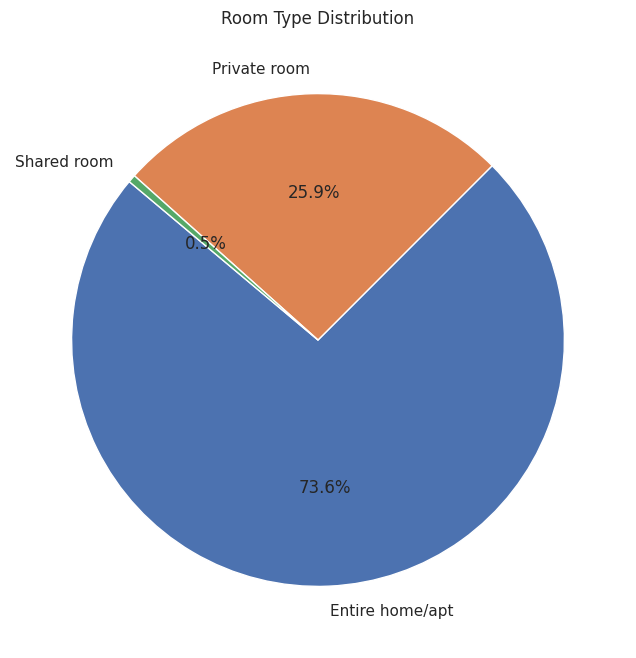

In [17]:
# Pie chart to show the distribution of different room types
room_type_counts = listings_df['room_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Room Type Distribution")
plt.show()


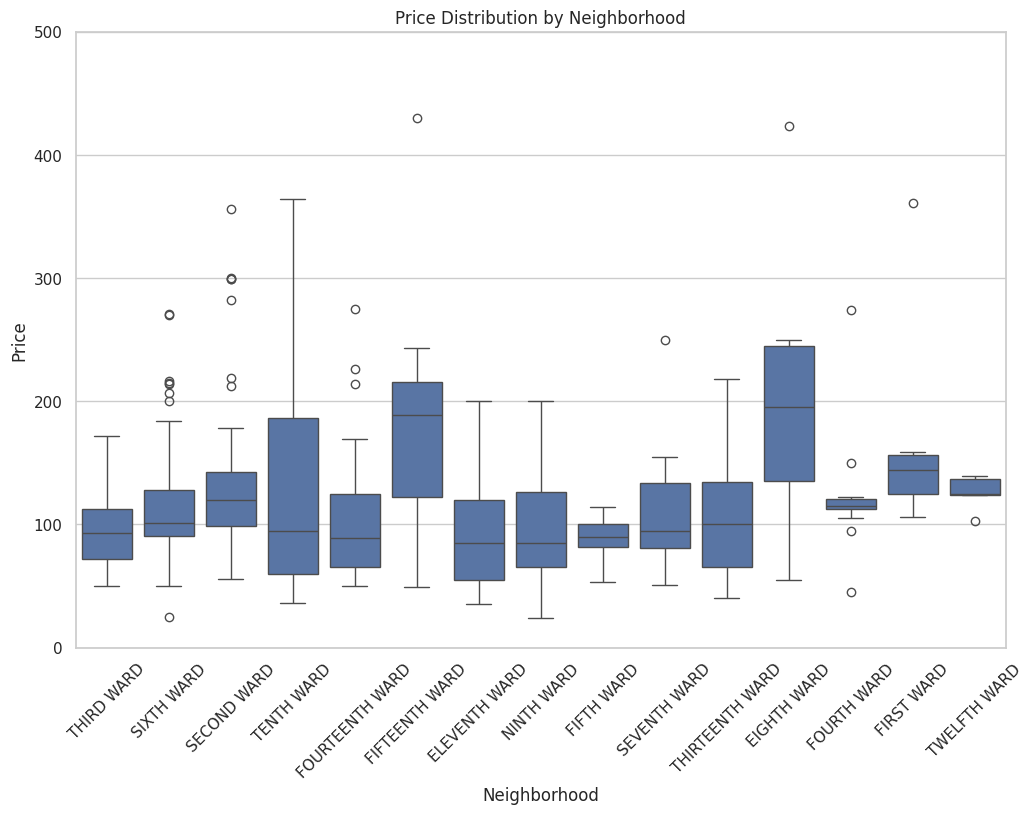

In [24]:
# Boxplot for price distribution by neighborhood
# Using 'neighbourhood_cleansed' if it contains valid data
if 'neighbourhood_cleansed' in listings_df.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=listings_df.dropna(subset=['neighbourhood_cleansed']), x='neighbourhood_cleansed', y='price')
    plt.ylim(0, 500)  # Set y-axis limit to focus on the main price range
    plt.title("Price Distribution by Neighborhood")
    plt.xlabel("Neighborhood")
    plt.ylabel("Price")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


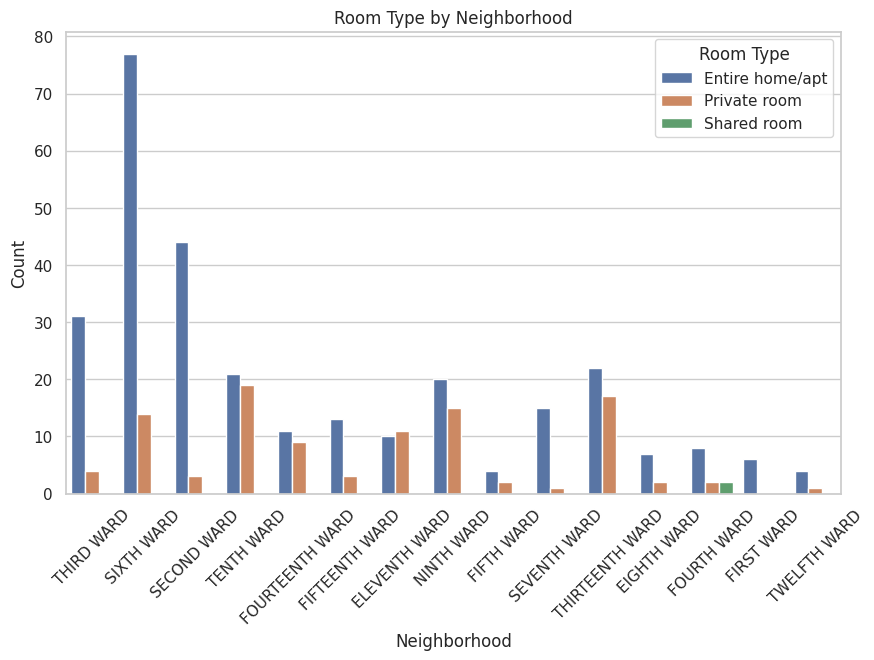

In [26]:
# Count plot for room type across neighborhoods
plt.figure(figsize=(10, 6))
sns.countplot(data=listings_df.dropna(subset=['neighbourhood_cleansed']),
              x='neighbourhood_cleansed', hue='room_type')
plt.title("Room Type by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()


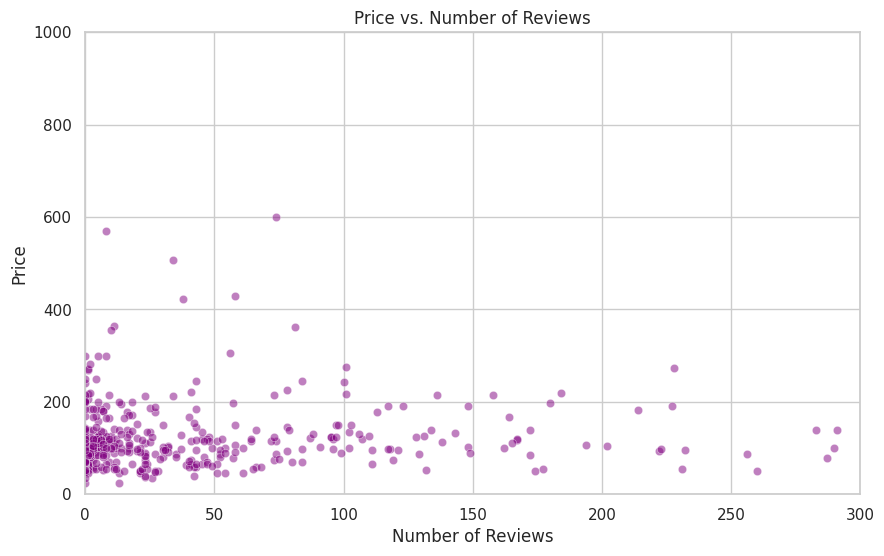

In [27]:
# Scatter plot for price vs. number of reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=listings_df, x='number_of_reviews', y='price', alpha=0.5, color='purple')
plt.title("Price vs. Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.xlim(0, 300)  # Limit x-axis for readability
plt.ylim(0, 1000)  # Limit y-axis to $1000 to reduce the effect of outliers
plt.show()

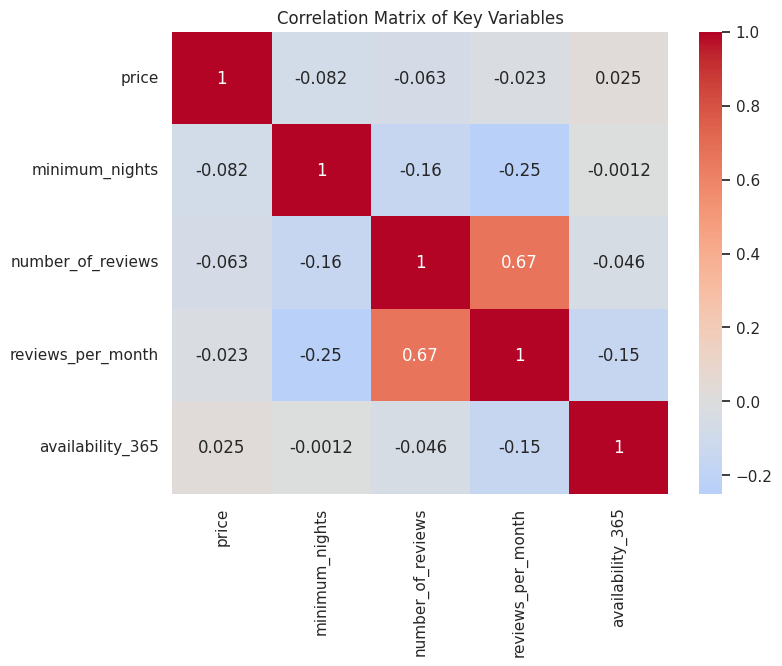

In [28]:
# Correlation heatmap for selected numeric columns
correlation = listings_df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Key Variables")
plt.show()